# Data mining Project

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Converting .txt to .csv

In [5]:
file_path = 'data.txt'

df = pd.read_csv(file_path, delimiter='\t', header=None)


columns = [
    "ID","Gender", "Age_Group", "Residence", "Education_Level", "Source_of_Income",
    "Marital_Status", "Smoked_Cigarettes", "Year_Diagnosed", "Surgical_Treatment",
    "Chemotherapy", "Radiotherapy", "Immunotherapy", "Molecular_targeted_Therapy",
    "Hospitalization_Number", "Time_to_Treatment", "Medical_Treatment_Need",
    "Emotional_Impact", "Travel_Impact", "Quality_of_Life", "Symptoms_exp_cough",
    "Symptoms_exp_Hoarseness","Symptoms_exp_Blood_cough","Symptoms_exp_chestpain",
    "Symptoms_exp_Shortness_of_breath","Symptoms_exp_weakness","Symptoms_exp_None",
    "Symptom_Frequency", "Symptom_Household_Impact", "Sleep_Issues", "Support_From_Close",
    "Dependency_Fear", "Health_Satisfaction", "Daily_Life_Impact_physical","Daily_Life_Impact_Psychological",
    "Daily_Life_Impact_proffesional","Daily_Life_Impact_family_life","Daily_Life_Impact_social_life",
    "Daily_Life_Impact_no_effect","Energy_Level", "Self_Care", "Daily_Activities_Difficulty",
    "Work_Readiness", "Support_Satisfaction", "Coping_Strategy", "Negative_Emotions"
]

df.columns = columns


df.to_csv('processed_survey_data_columns.csv', index=False)
df.head()

,ID,Gender,Age_Group,Residence,Education_Level,Source_of_Income,Marital_Status,Smoked_Cigarettes,Year_Diagnosed,Surgical_Treatment,...,Daily_Life_Impact_family_life,Daily_Life_Impact_social_life,Daily_Life_Impact_no_effect,Energy_Level,Self_Care,Daily_Activities_Difficulty,Work_Readiness,Support_Satisfaction,Coping_Strategy,Negative_Emotions
0,1,1,1,2,4,1,1,1,2021,0,...,0,0,0,2,1,1,2,2,3,3
1,2,1,2,4,3,1,2,1,2020,1,...,0,0,0,2,1,2,2,2,3,3
2,3,1,2,2,4,1,2,1,2020,1,...,0,0,0,2,1,1,2,1,3,2
3,4,2,4,4,3,3,2,1,2021,1,...,0,0,0,4,2,3,3,1,3,4
4,5,2,3,1,2,1,2,1,2019,1,...,0,0,0,2,1,1,3,3,3,3


# Data cleaning

In [6]:
df.shape

(300, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   gender                            300 non-null    int64
 1   age_group                         300 non-null    int64
 2   residence                         300 non-null    int64
 3   education_level                   300 non-null    int64
 4   source_of_income                  300 non-null    int64
 5   marital_status                    300 non-null    int64
 6   smoked_cigarettes                 300 non-null    int64
 7   year_diagnosed                    300 non-null    int64
 8   surgical_treatment                300 non-null    int64
 9   chemotherapy                      300 non-null    int64
 10  radiotherapy                      300 non-null    int64
 11  immunotherapy                     300 non-null    int64
 12  molecular_targeted_therapy        30

In [17]:
df.isna().sum()

ID                                  0
Gender                              0
Age_Group                           0
Residence                           0
Education_Level                     0
Source_of_Income                    0
Marital_Status                      0
Smoked_Cigarettes                   0
Year_Diagnosed                      0
Surgical_Treatment                  0
Chemotherapy                        0
Radiotherapy                        0
Immunotherapy                       0
Molecular_targeted_Therapy          0
Hospitalization_Number              0
Time_to_Treatment                   0
Medical_Treatment_Need              0
Emotional_Impact                    0
Travel_Impact                       0
Quality_of_Life                     0
Symptoms_exp_cough                  0
Symptoms_exp_Hoarseness             0
Symptoms_exp_Blood_cough            0
Symptoms_exp_chestpain              0
Symptoms_exp_Shortness_of_breath    0
Symptoms_exp_weakness               0
Symptoms_exp

In [23]:
# 1. Remove duplicate rows
df = df.drop_duplicates()
print(f"\nData after removing duplicates: {df.shape}")

# 2. Handle missing values
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing categorical values with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
print(f"\nData after handling missing values:\n{df.isnull().sum()}")

# 3. Drop irrelevant or redundant columns  
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# 4. Standardize column names  
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]


Data after removing duplicates: (300, 45)

Data after handling missing values:
gender                              0
age_group                           0
residence                           0
education_level                     0
source_of_income                    0
marital_status                      0
smoked_cigarettes                   0
year_diagnosed                      0
surgical_treatment                  0
chemotherapy                        0
radiotherapy                        0
immunotherapy                       0
molecular_targeted_therapy          0
hospitalization_number              0
time_to_treatment                   0
medical_treatment_need              0
emotional_impact                    0
travel_impact                       0
quality_of_life                     0
symptoms_exp_cough                  0
symptoms_exp_hoarseness             0
symptoms_exp_blood_cough            0
symptoms_exp_chestpain              0
symptoms_exp_shortness_of_breath    0
symptoms

**All columns are integer value, numerical columns. But we have categorical columns in them like Gender, Marital Status, Smoked cigaretes, Chemoheraphy etc. ( some are binary, some are multiclass)**

In [22]:
df.head()

,gender,age_group,residence,education_level,source_of_income,marital_status,smoked_cigarettes,year_diagnosed,surgical_treatment,chemotherapy,...,daily_life_impact_family_life,daily_life_impact_social_life,daily_life_impact_no_effect,energy_level,self_care,daily_activities_difficulty,work_readiness,support_satisfaction,coping_strategy,negative_emotions
0,1,1,2,4,1,1,1,2021,0,1,...,0,0,0,2,1,1,2,2,3,3
1,1,2,4,3,1,2,1,2020,1,1,...,0,0,0,2,1,2,2,2,3,3
2,1,2,2,4,1,2,1,2020,1,0,...,0,0,0,2,1,1,2,1,3,2
3,2,4,4,3,3,2,1,2021,1,1,...,0,0,0,4,2,3,3,1,3,4
4,2,3,1,2,1,2,1,2019,1,1,...,0,0,0,2,1,1,3,3,3,3


**This chunk below is good if we had categorical columns detected.**

In [41]:
df.nunique()

gender                              2
age_group                           4
residence                           4
education_level                     4
source_of_income                    4
marital_status                      4
smoked_cigarettes                   2
year_diagnosed                      7
surgical_treatment                  2
chemotherapy                        2
radiotherapy                        2
immunotherapy                       2
molecular_targeted_therapy          2
hospitalization_number              4
time_to_treatment                   3
medical_treatment_need              4
emotional_impact                    2
travel_impact                       2
quality_of_life                     4
symptoms_exp_cough                  2
symptoms_exp_hoarseness             2
symptoms_exp_blood_cough            2
symptoms_exp_chestpain              2
symptoms_exp_shortness_of_breath    2
symptoms_exp_weakness               2
symptoms_exp_none                   2
symptom_freq

In [74]:
#to detect categories we can check the number of unique values in each columns, if it is less than 5 we can check them...
df.columns[df.nunique()>4]
#Looks like only year diagnosed has more than 4 entries and it is 7 ! It can be also taken as Categorical.
df.year_diagnosed.nunique()

7

In [ ]:
# # Checking for Imbalances
# imbalances = {}

# for col in categorical_columns:
#     counts = df[col].value_counts(normalize=True)
#     if any(counts < 0.1):  
#         imbalances[col] = counts

# for col, counts in imbalances.items():
#     print(f"\nColumn: {col}")
#     print(counts)

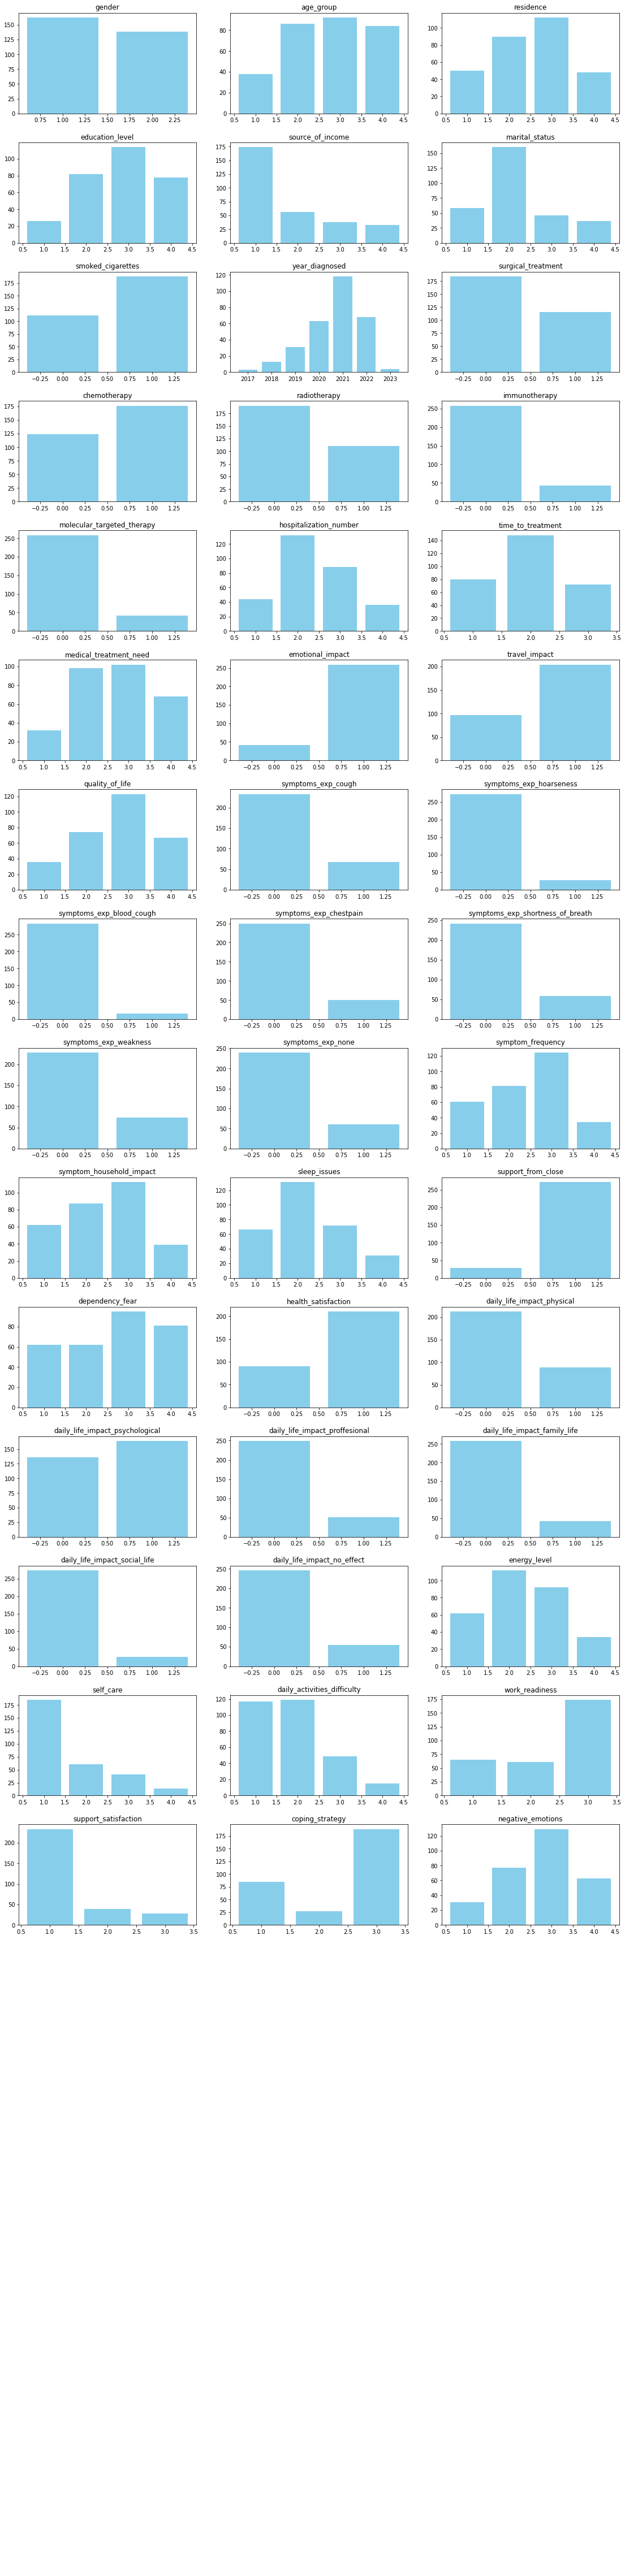

In [125]:
nrow=20
ncol=3
n=0
# Create a Figure
fig, axes = plt.subplots(nrow, ncol, figsize=(16, 64))
fig.tight_layout(pad=3)  # Adjust spacing between subplots

# Flatten the 2D axes array to iterate over it easily
axes = axes.flatten()

# Plot each column in the DataFrame
for col in df.columns:
    counts=df[col].value_counts()
    if n >= len(axes):  # Stop if we exceed the number of subplots
        break
    ax = axes[n]
    ax.bar(counts.index, counts.values, color='skyblue')  # Bar plot for each column
    ax.set_title(col)  # Title for each subplot
    n += 1

# Hide unused subplots (if any)
for i in range(n, len(axes)):
    axes[i].axis('off')

# Show the final plot
plt.show()

There is imbalance in some  columns. 
 



In [106]:
#Quick check for correlations
import seaborn as sns
correlation=df.corr()


<Axes: >

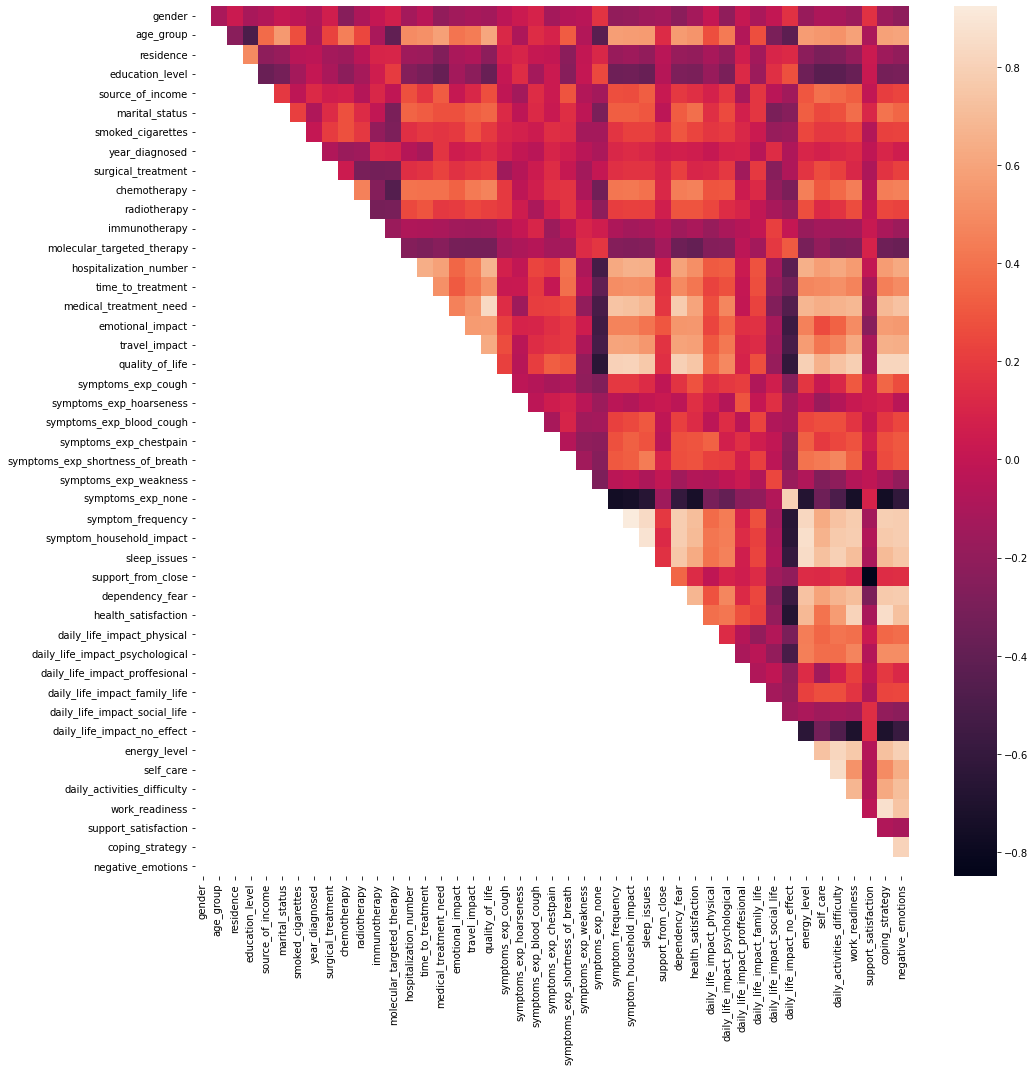

In [118]:
# Mask the upper triangle (to avoid duplicate pairs)

mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)

# Apply the mask to the correlation matrix
masked_corr = correlation.where(mask)
plt.figure(figsize=(16,16))

sns.heatmap(masked_corr)


# Highly correlated pairs at first glance:

In [122]:

high_corr_pairs = masked_corr.stack().loc[lambda x: x > 0.75]

# Display the highly correlated pairs
print(high_corr_pairs)

medical_treatment_need    quality_of_life                0.836878
                          dependency_fear                0.774507
quality_of_life           symptom_frequency              0.804922
                          symptom_household_impact       0.810825
                          sleep_issues                   0.763622
                          dependency_fear                0.798719
                          energy_level                   0.795971
                          work_readiness                 0.787306
                          coping_strategy                0.822634
                          negative_emotions              0.821857
symptoms_exp_none         daily_life_impact_no_effect    0.798049
symptom_frequency         symptom_household_impact       0.924228
                          sleep_issues                   0.844186
                          dependency_fear                0.781332
                          energy_level                   0.828773
          